# VGG16 on FashionMnist Dataset

#### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


#### Loading the dataset

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

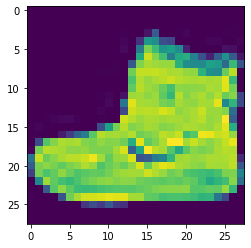

In [3]:
plt.imshow(x_train[0])

#### Resizing and Preprocessing the images
    - Initial size : (28x28)
    - Final size : (139x139)

In [0]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [0]:
rgb_list = []
dim = (139, 139)
#convert X_train data to 48x48 rgb values
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_train = np.squeeze(rgb_arr, axis=4)

In [0]:
rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_test = np.squeeze(rgb_arr, axis=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


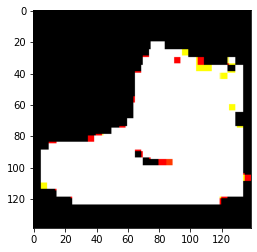

In [7]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)
plt.imshow(X_train[0])

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 139, 139, 3) (10000, 139, 139, 3) (60000, 10) (10000, 10)


#### Model Building

In [0]:
base = VGG16(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

#### Freezing the base model layers

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              2101248   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.7827 - accuracy: 0.7997 - val_loss: 0.3885 - val_accuracy: 0.8639
Epoch 2/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.3615 - accuracy: 0.8696 - val_loss: 0.3527 - val_accuracy: 0.8747
Epoch 3/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.3197 - accuracy: 0.8840 - val_loss: 0.3460 - val_accuracy: 0.8754
Epoch 4/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.2911 - accuracy: 0.8932 - val_loss: 0.3400 - val_accuracy: 0.8806
Epoch 5/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.2724 - accuracy: 0.8982 - val_loss: 0.3191 - val_accuracy: 0.8840
Epoch 6/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.2556 - accuracy: 0.9052 - val_loss: 0.3513 - val_accuracy: 0.8795
Epoch 7/10
60000/60000 [==============================] - 336s

#### Model Performance Evaluation

In [0]:
  from sklearn.metrics import precision_score,recall_score,log_loss

In [15]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.8374384236453202
Precision for class 1 = 0.9828629032258065
Precision for class 2 = 0.8566912539515279
Precision for class 3 = 0.9095982142857143
Precision for class 4 = 0.8947368421052632
Precision for class 5 = 0.9582089552238806
Precision for class 6 = 0.6801470588235294
Precision for class 7 = 0.9498495486459378
Precision for class 8 = 0.9799196787148594
Precision for class 9 = 0.9656912209889001
Mean Precision =  0.9015144099610739


In [17]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.85
Recall for class 1 = 0.975
Recall for class 2 = 0.813
Recall for class 3 = 0.815
Recall for class 4 = 0.731
Recall for class 5 = 0.963
Recall for class 6 = 0.74
Recall for class 7 = 0.947
Recall for class 8 = 0.976
Recall for class 9 = 0.957
Mean Recall =  0.8766999999999999


In [18]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  3.4398318704238138
